# Principal Component Analysis

## import library

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [147]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)
print(feature.shape, x.shape, y.shape)

(50, 2) (50,) (50,)


## plot the input data

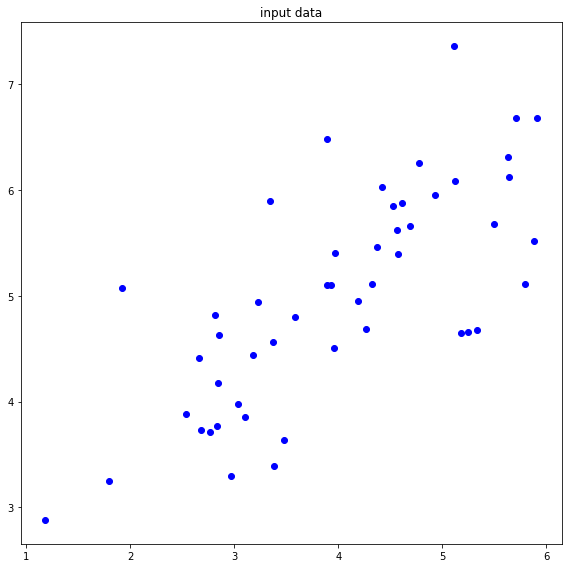

In [148]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x,y,'o', color = 'blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

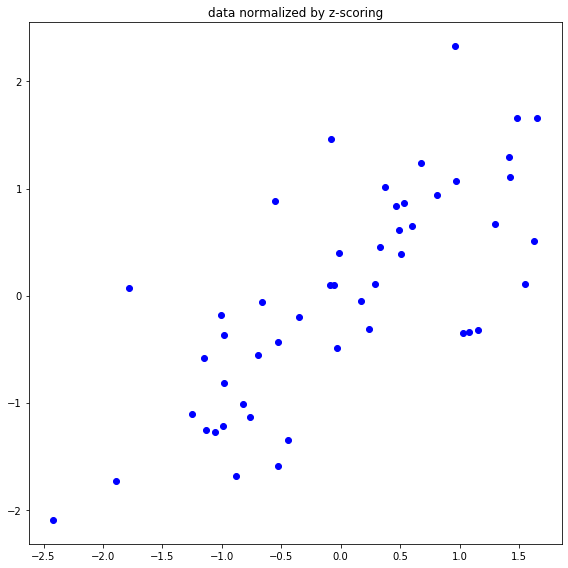

-1.509903313490213e-16 -4.840572387365683e-16 0.9999999999999999 0.9999999999999999


In [149]:

plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

nor_x =  (x - np.mean(x)) / np.std(x)
nor_y = (y - np.mean(y)) / np.std(y)
nor_feature = np.zeros_like(feature)
nor_feature[:,0] = nor_x
nor_feature[:,1] = nor_y
plt.plot(nor_x,nor_y,'o', color = 'blue')
plt.tight_layout()
plt.show()
print(np.mean(nor_x), np.mean(nor_y), np.std(nor_x), np.std(nor_y))

def plot_normalized_data(nor_feature):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    nor_x = nor_feature[:,0]
    nor_y = nor_feature[:,1]
    plt.plot(nor_x, nor_y, 'o', color = 'blue')
    plt.tight_layout()
    plt.show()

## compute covariance matrix

In [150]:
def compute_covariance(feature):
    # feature.shape = (50,2)
    #feat_T.shape = (2,50)
    feat_T = feature.T
    
    Sigma = feat_T@feature
    #Sigma.shape = (2,2)
    return Sigma

## compute principal directions

In [151]:
def compute_eigen(X):
    # discard eig_value, only get eig_vec
    eig_val, eig_vec = np.linalg.eig(X)
    first = np.where(eig_val == np.max(eig_val))[0][0]
    S = eig_vec[:,first]
    eig_val = np.delete(eig_val, first)
    eig_vec = np.delete(eig_vec, first, axis = 1)
    second = np.where(eig_val == np.max(eig_val))[0][0]
    U = eig_vec[:,second]
    
    return S, U

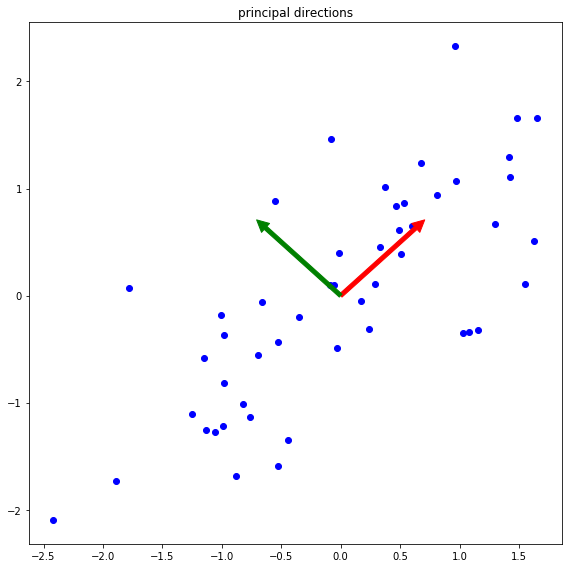

In [152]:
plt.figure(figsize=(8,8))
plt.title('principal directions')

cov = compute_covariance(nor_feature)
fir,sec = compute_eigen(cov)
plt.plot(nor_x,nor_y,'o',color = 'blue')

plt.annotate('',xy = (fir[0],fir[1]),xytext=(0,0) ,arrowprops=dict(facecolor='red', edgecolor='red',fill=True))
plt.annotate('',xy = (sec[0],sec[1]),xytext=(0,0) ,arrowprops=dict(facecolor='green', edgecolor='green',fill=True))

plt.tight_layout()
plt.show()

def plot_first_second_principal_dir(nor_feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    cov = compute_covariance(nor_feature)
    fir,sec = compute_eigen(cov)
    plt.plot(nor_feature[:,0],nor_feature[:,1],'o',color = 'blue')
    plt.annotate('',xy = (fir[0],fir[1]),xytext=(0,0) ,arrowprops=dict(facecolor='red', edgecolor='red',fill=True))
    plt.annotate('',xy = (sec[0],sec[1]),xytext=(0,0) ,arrowprops=dict(facecolor='green', edgecolor='green',fill=True))

    plt.tight_layout()
    plt.show()

## first principal axis

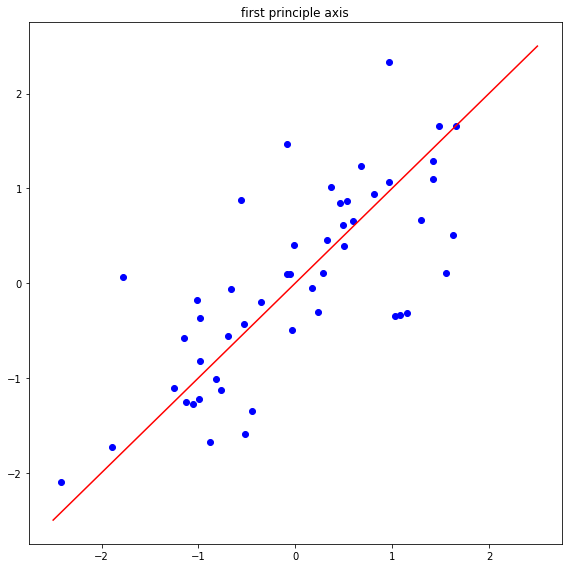

In [153]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')
plt.plot(nor_x, nor_y,'o', color = 'blue')

#plt.plot( (np.min(nor_x), np.max(nor_x)), (np.min(nor_x)*fir[1] / fir[0],np.max(nor_x) *fir[1]/fir[0]), '-', color = 'red')
plt.plot( (-2.5,2.5), (-2.5*fir[1] / fir[0],2.5 *fir[1]/fir[0]), '-', color = 'red')
    

plt.tight_layout()
plt.show()
def plot_principal_axis(nor_x, nor_y,vector,name):
    plt.figure(figsize=(8,8))
    plt.title(name+' principle axis')
    plt.plot(nor_x, nor_y,'o', color = 'blue')

#plt.plot( (np.min(nor_x), np.max(nor_x)), (np.min(nor_x)*fir[1] / fir[0],np.max(nor_x) *fir[1]/fir[0]), '-', color = 'red')
    plt.plot( (-2.5,2.5), (-2.5*vector[1] / vector[0],2.5 *vector[1]/vector[0]), '-', color = 'red')
    

    plt.tight_layout()
    plt.show()
    

## second principal axis

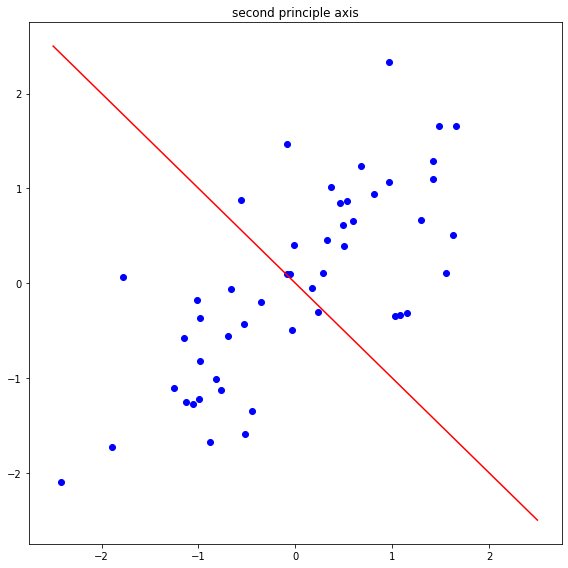

In [154]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')
plt.plot(nor_x, nor_y,'o', color = 'blue')

plt.plot( (-2.5,2.5), (-2.5*sec[1] / sec[0],2.5 *sec[1]/sec[0]), '-', color = 'red')

plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [155]:
def compute_projection_onto_line(feature, vector):
    projection = np.zeros_like(feature)
    projection[:,0] = (feature[:,0] * vector[0] / vector[1] + feature[:,1]) / (vector[0]/vector[1] + vector[1]/vector[0])
    projection[:,1] = (feature[:,0] + feature[:,1] * vector[1] / vector[0]) / (vector[0]/vector[1] + vector[1]/vector[0])
 #   fir[0]/fir[1] x1 + y1 / (fir[0]/fir[1] + fir[1]/fir[0])
 #   x1 + fir[1]/fir[0]y1 / (fir[0]/fir[1] + fir[1]/fir[0])

    
    return projection

## projcet to the first principal axis

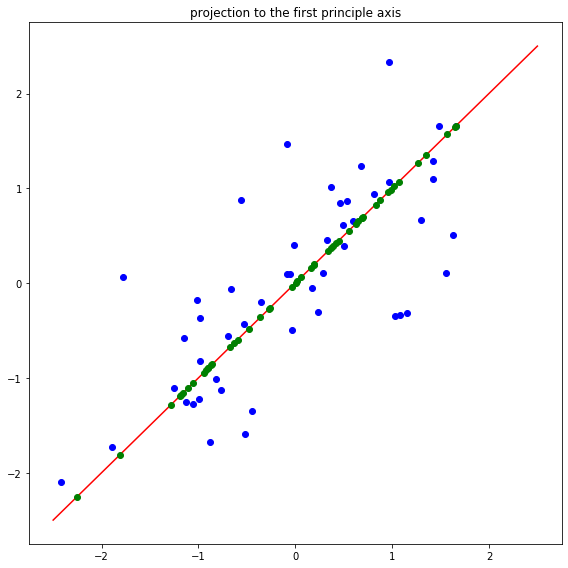

In [156]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
plt.plot(nor_x, nor_y,'o', color = 'blue')

plt.plot( (-2.5,2.5), (-2.5*fir[1] / fir[0],2.5 *fir[1]/fir[0]), '-', color = 'red')

first_projection = compute_projection_onto_line(nor_feature, fir)
plt.plot(first_projection[:,0],first_projection[:,1],'o', color = 'green')
plt.tight_layout()

plt.show()
def plot_projection(nor_feature,vector,name):
    plt.figure(figsize=(8,8))
    plt.title("projection to the "+ name + " principle axis")
    plt.plot(nor_feature[:,0], nor_feature[:,1],'o', color = 'blue')

    plt.plot( (-2.5,2.5), (-2.5*vector[1] / vector[0],2.5 *vector[1]/vector[0]), '-', color = 'red')

    projection = compute_projection_onto_line(nor_feature, vector)
    plt.plot(projection[:,0],projection[:,1],'o', color = 'green')
    plt.tight_layout()

    plt.show()

## projcet to the second principal axis

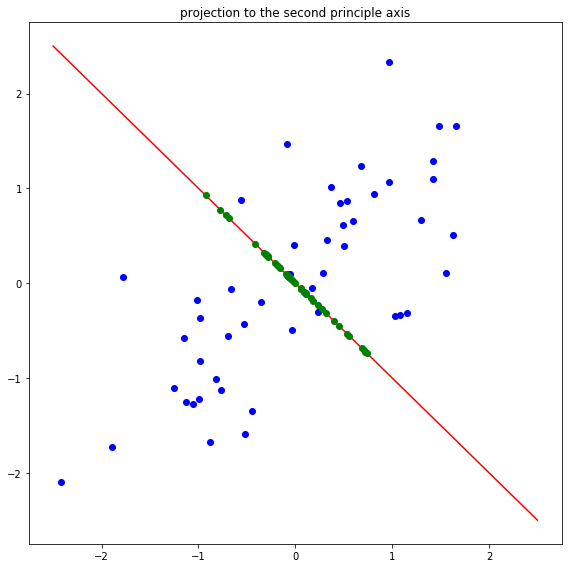

In [157]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(nor_x, nor_y,'o', color = 'blue')

plt.plot( (-2.5,2.5), (-2.5*sec[1] / sec[0],2.5 *sec[1]/sec[0]), '-', color = 'red')

second_projection = compute_projection_onto_line(nor_feature, sec)
plt.plot(second_projection[:,0],second_projection[:,1],'o', color = 'green')

plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

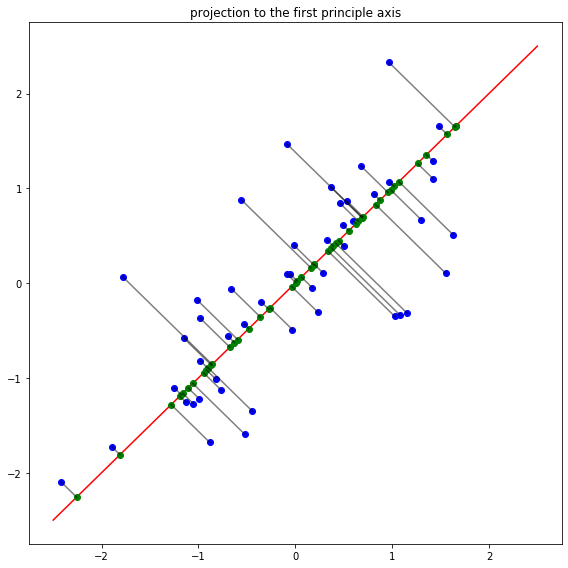

In [158]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(nor_x, nor_y,'o', color = 'blue')

plt.plot( (-2.5,2.5), (-2.5*fir[1] / fir[0],2.5 *fir[1]/fir[0]), '-', color = 'red')

first_projection = compute_projection_onto_line(nor_feature, fir)
plt.plot(first_projection[:,0],first_projection[:,1],'o', color = 'green')

for i in range(feature.shape[0]):
    plt.plot((nor_feature[i][0],first_projection[i][0]), (nor_feature[i][1], first_projection[i][1]),'-',color = 'black', alpha = 0.5)



plt.tight_layout()
plt.show()

def plot_connection(nor_feature, vector, name):
    plt.figure(figsize=(8,8))
    plt.title('projection to the '+  name + ' principle axis')

    plt.plot(nor_feature[:,0], nor_feature[:,1],'o', color = 'blue')

    plt.plot( (-2.5,2.5), (-2.5*vector[1] / vector[0],2.5 *vector[1]/vector[0]), '-', color = 'red')

    projection = compute_projection_onto_line(nor_feature, vector)
    plt.plot(projection[:,0],projection[:,1],'o', color = 'green')

    for i in range(feature.shape[0]):
        plt.plot((nor_feature[i][0],projection[i][0]), (nor_feature[i][1], projection[i][1]),'-',color = 'black', alpha = 0.5)



    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the second principal axis

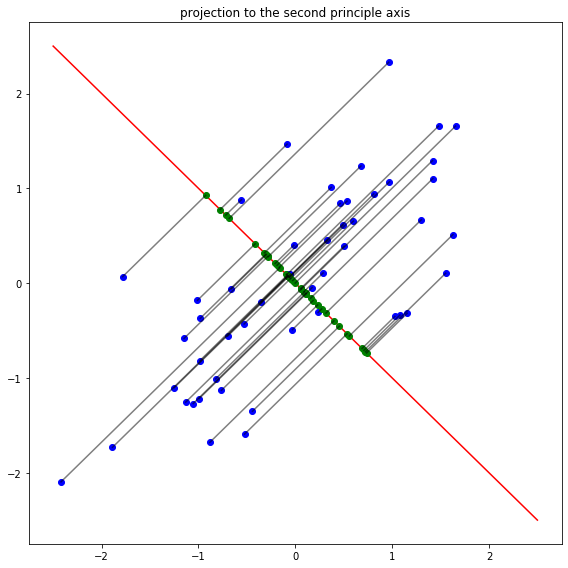

In [159]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(nor_x, nor_y,'o', color = 'blue')

plt.plot( (-2.5,2.5), (-2.5*sec[1] / sec[0],2.5 *sec[1]/sec[0]), '-', color = 'red')


second_projection = compute_projection_onto_line(nor_feature, sec)
plt.plot(second_projection[:,0],second_projection[:,1],'o', color = 'green')

for i in range(feature.shape[0]):
    plt.plot((nor_feature[i][0],second_projection[i][0]), (nor_feature[i][1], second_projection[i][1]),'-',color = 'black', alpha = 0.5)


plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

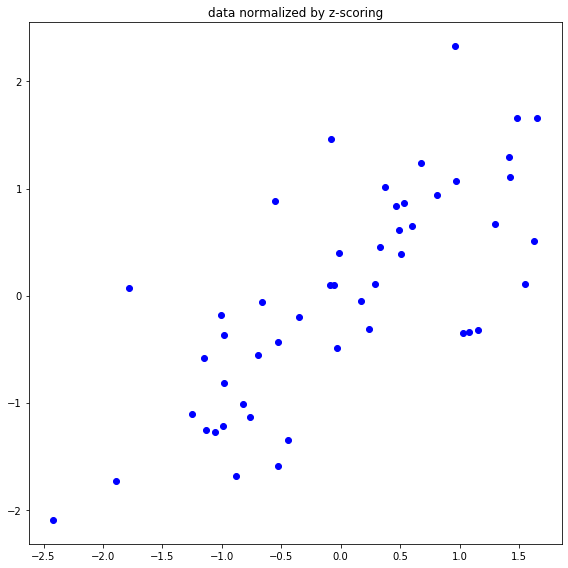

In [160]:
plot_normalized_data(nor_feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

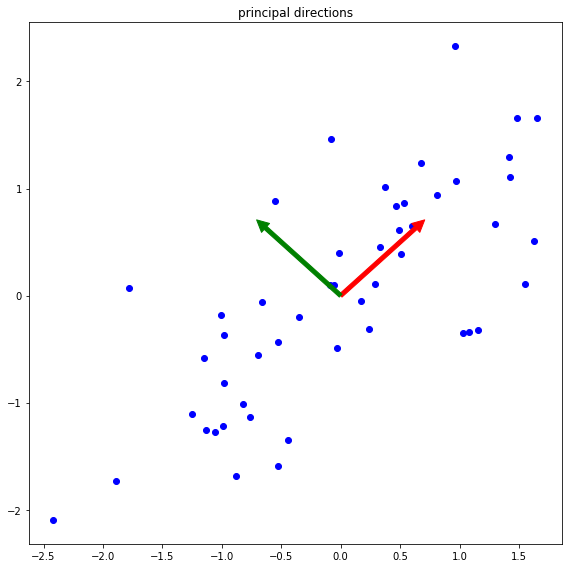

In [161]:
plot_first_second_principal_dir(nor_feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

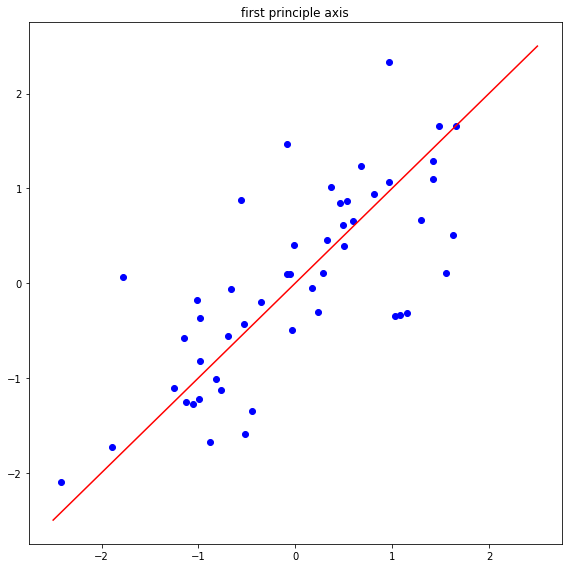

In [162]:
plot_principal_axis(nor_x, nor_y, fir,"first")

***

### 4. plot the second principal axis in red on the normalized data in blue

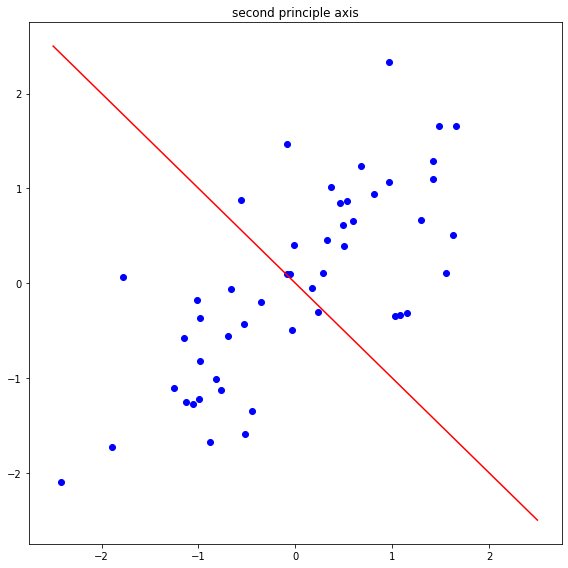

In [163]:
plot_principal_axis(nor_x, nor_y,sec,"second")

***

### 5. plot the projection of data in green onto the first principal axis in red

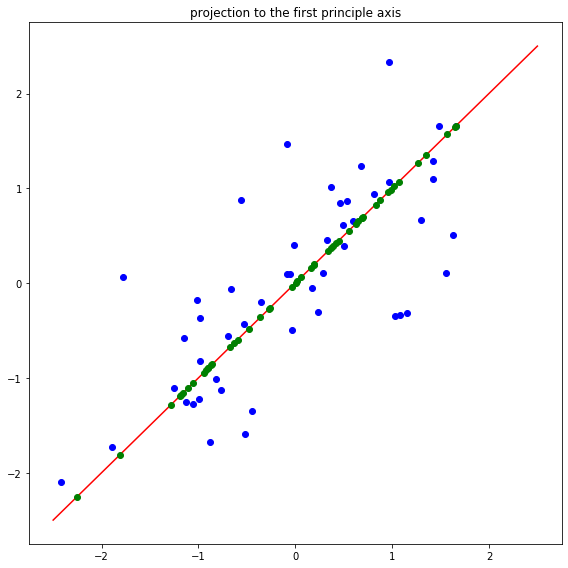

In [164]:
plot_projection(nor_feature,fir,"first")

***

### 6. plot the projection of data in green onto the second principal axis in red

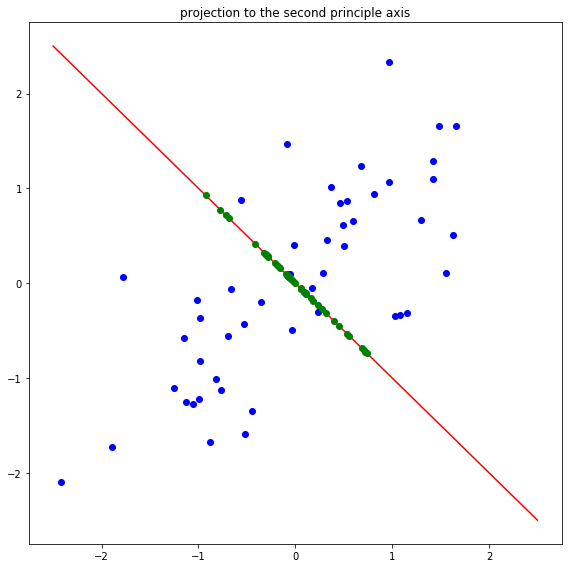

In [165]:
plot_projection(nor_feature,sec,"second")

***

### 7. plot the projection line in grey onto the first principal axis

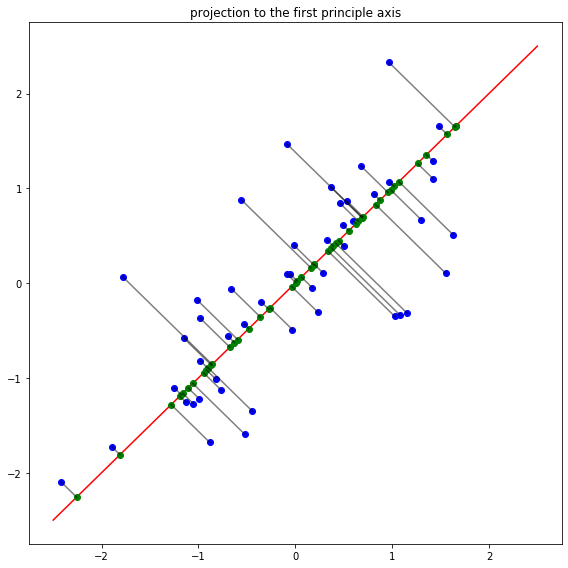

In [166]:
plot_connection(nor_feature, fir, "first")

***

### 8. plot the projection line in grey onto the second principal axis

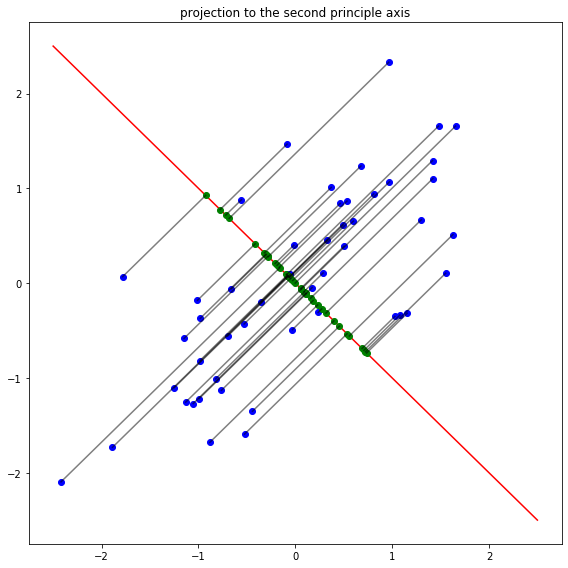

In [167]:
plot_connection(nor_feature, sec, "second")

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***